Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [1]:
from random import choices, sample
from lab9_lib import *

In [2]:
class Individual:
    def __init__(self, loci, problem):
        self.genoma = choices([0, 1], k=loci)
        self.fitness = 0  
        self.problem = problem

    def calculate_fitness(self):
        self.fitness = self.problem(self.genoma)

    def __repr__(self):
        return f'Individual(genoma={self.genoma}, fitness={self.fitness})'

In [3]:
def initialize_population(population_size, genome_length, problem):
    population = [Individual(genome_length, problem) for _ in range(population_size)]
    return population


In [4]:
def tournament_selection(population, tournament_size):
    tournament_participants = choices(population, k=tournament_size)
    return max(tournament_participants, key=lambda individual: individual.fitness)

In [5]:
def tournament_selection_(population, tournament_size):
    tournament_participants = choices(population, k=tournament_size)
    return max(tournament_participants, key=lambda individual: sum(individual.genoma))

In [6]:
def crossover(parent1, parent2):
    child = Individual(len(parent1.genoma), parent1.problem)
    child.genoma = [choices([parent1.genoma[i], parent2.genoma[i]])[0] for i in range(len(parent1.genoma))]
    return child

In [7]:
def mutation(individual, mutation_rate):
    for i in range(len(individual.genoma)):
        if choices([True, False], [mutation_rate, 1 - mutation_rate])[0]:
            individual.genoma[i] = 1 - individual.genoma[i]
    return individual

In [8]:
def generate_new_population(selected_parents, n_individuals, mutation_rate):
    new_population = []
    while len(new_population) < n_individuals:
        parent1, parent2 = sample(selected_parents, 2)
        child1 = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        new_population.append(child1)
    return new_population[:n_individuals]

In [9]:
def run_evolutionary_algorithm_until_target(population, population_size, n_parents, tournament_size, mutation_rate, target_fitness, stagnation_limit, start_generation_for_stagnation):
    populations = [population]

    best_fitness = 0
    generations_without_improvement = 0

    i = 0
    while generations_without_improvement < stagnation_limit or i < start_generation_for_stagnation:
        for individual in population:
            individual.calculate_fitness()

        current_best_fitness = max(individual.fitness for individual in population)
        if current_best_fitness == target_fitness:
            break
        if i >= start_generation_for_stagnation:
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                generations_without_improvement = 0
            else:
                generations_without_improvement += 1

        selected_parents = [tournament_selection(population, tournament_size) for _ in range(n_parents)]
        population = generate_new_population(selected_parents, population_size, mutation_rate)
        populations.append(population)
        i += 1
    for individual in populations[-1]:
            individual.calculate_fitness()

    return populations, i

In [10]:
def run_evolutionary_algorithm_until_target_(population, population_size, n_parents, tournament_size, mutation_rate, target_fitness, stagnation_limit, start_generation_for_stagnation):
    populations = [population]

    best_fitness = 0
    generations_without_improvement = 0

    i = 0
    while generations_without_improvement < stagnation_limit or i < start_generation_for_stagnation:
        for individual in population:
            individual.calculate_fitness()

        current_best_fitness = max(individual.fitness for individual in population)
        if current_best_fitness == target_fitness:
            break
        if i >= start_generation_for_stagnation:
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                generations_without_improvement = 0
            else:
                generations_without_improvement += 1

        selected_parents = [tournament_selection_(population, tournament_size) for _ in range(n_parents)]
        population = generate_new_population(selected_parents, population_size, mutation_rate)
        populations.append(population)
        i += 1
    for individual in populations[-1]:
            individual.calculate_fitness()

    return populations, i

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fitness(a_values, populations, start_generation_for_stagnation):
    for a in a_values:
        plt.plot([max([individual.fitness for individual in population]) for population in populations[a][0]], label=f"a={a}")
    #for a in a_values:
        #for i in range(1, len(populations[a][1])):
        #    plt.axvline(x=sum(populations[a][1][:i+1]), color=plt.gca().lines[a_values.index(a)].get_color(), linestyle=':')
        #    print(sum(populations[a][1][:i]))
        #plt.axvline(x=sum(populations[a][1]), color=plt.gca().lines[a_values.index(a)].get_color(), linestyle=':')
    
    plt.axvline(x=start_generation_for_stagnation, color='black', linestyle=':')
    plt.text(start_generation_for_stagnation + 1, plt.gca().get_ylim()[1], 'Start Early Stopping', verticalalignment='top', color='black')
    
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()



# Result considering the fitness for parent selection

In [12]:
population_size = 100
genome_length = 1000
n_parents = 20
mutation_rate = 0.01
tournament_size = 10
stagnation_limit = 50
start_generation_for_stagnation=50

a_values = [1, 2, 5, 10]
#a_values = [1]
populations = {}
problems = {}
for a in a_values:
    problem = make_problem(a)
    problems[a] = problem
    population = initialize_population(population_size, genome_length, problem)
    populations[a] = [[population], [0]]

for a in a_values:
    pops, generations_needed = run_evolutionary_algorithm_until_target(populations[a][0][-1] ,population_size, n_parents, tournament_size, mutation_rate, 1, stagnation_limit, start_generation_for_stagnation)
    populations[a][0].extend(pops[1:])
    populations[a][1].append(generations_needed)

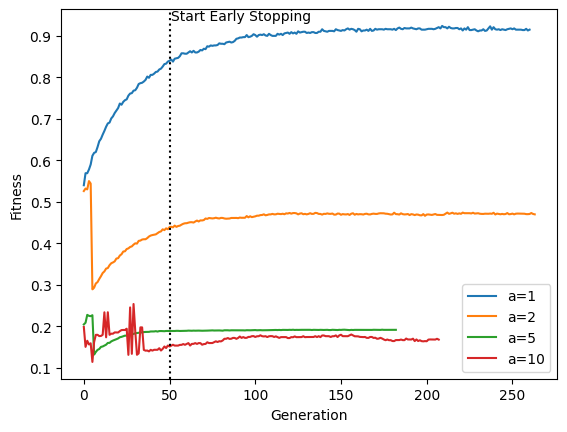

In [13]:
plot_fitness(a_values, populations, start_generation_for_stagnation)

In [14]:
best_fitnesses = {}
for a in a_values:
    best_fitnesses[a] = [max([individual.fitness for individual in population]) for population in populations[a][0]]
    print(f"Problem {a} \nBest fitness: {max(best_fitnesses[a])} in generation {best_fitnesses[a].index(max(best_fitnesses[a]))} \nTotal generations: {len(best_fitnesses[a])} \nFitness calls: {problems[a].calls}\nPopulation size: {population_size}\n")
    

Problem 1 
Best fitness: 0.924 in generation 209 
Total generations: 261 
Fitness calls: 26100
Population size: 100

Problem 2 
Best fitness: 0.55 in generation 3 
Total generations: 264 
Fitness calls: 26400
Population size: 100

Problem 5 
Best fitness: 0.227516 in generation 2 
Total generations: 183 
Fitness calls: 18300
Population size: 100

Problem 10 
Best fitness: 0.253724508 in generation 29 
Total generations: 208 
Fitness calls: 20800
Population size: 100



# Result considering the number of ones in the genome for parent selection

In [15]:
population_size_ = 100
genome_length_ = 1000
n_parents_ = 20
mutation_rate_ = 0.01
tournament_size_ = 10
stagnation_limit_ = 50
start_generation_for_stagnation_= 50

a_values_ = [1, 2, 5, 10]
#a_values_ = [1]
populations_ = {}
problems_ = {}
for a in a_values_:
    problem_ = make_problem(a)
    problems_[a] = problem_
    population_ = initialize_population(population_size_, genome_length_, problem_)
    populations_[a] = [[population_], [0]]

for a in a_values_:
    pops_, generations_needed_ = run_evolutionary_algorithm_until_target_(populations_[a][0][-1] ,population_size_, n_parents_, tournament_size_, mutation_rate_, 1, stagnation_limit_, start_generation_for_stagnation)
    populations_[a][0].extend(pops_[1:])
    populations_[a][1].append(generations_needed_)

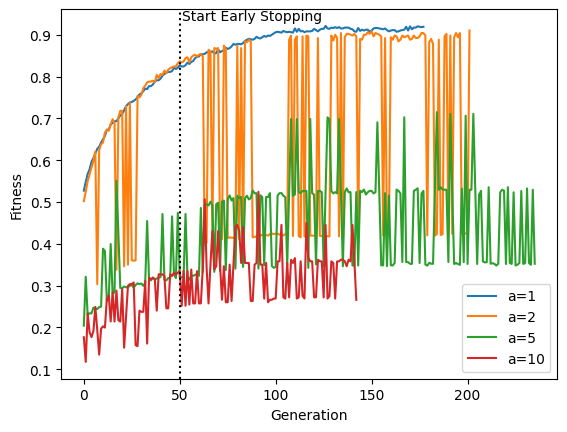

In [16]:
plot_fitness(a_values_, populations_, start_generation_for_stagnation_)

In [17]:
best_fitnesses_ = {}
for a in a_values_:
    best_fitnesses_[a] = [max([individual.fitness for individual in population_]) for population_ in populations_[a][0]]
    print(f"Problem {a} \nBest fitness: {max(best_fitnesses_[a])} in generation {best_fitnesses_[a].index(max(best_fitnesses_[a]))} \nTotal generations: {len(best_fitnesses_[a])} \nFitness calls: {problems_[a].calls}\nPopulation size: {population_size_}\n")
    

Problem 1 
Best fitness: 0.921 in generation 126 
Total generations: 178 
Fitness calls: 17800
Population size: 100

Problem 2 
Best fitness: 0.91 in generation 201 
Total generations: 202 
Fitness calls: 20200
Population size: 100

Problem 5 
Best fitness: 0.7149 in generation 184 
Total generations: 236 
Fitness calls: 23600
Population size: 100

Problem 10 
Best fitness: 0.5242342999999999 in generation 91 
Total generations: 143 
Fitness calls: 14300
Population size: 100

